# Financial Data Analysis for Loan Approval


The core purpose of this project is to clean, transform and analyze historical loan data and create a model that predicts whether a loan application should be approved or denied.

Importing the relevant packages

In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

Loading the relevant dataset

In [233]:
df = pd.read_csv("loan_application_data.csv")

## Step 1 - Data Exploration and Cleaning

### Data Exploration - Getting a brief overview of the data 

In [234]:
#display first 5 rows
df.head()

,ApplicationDate,CreditScore,AnnualIncome,LoanAmount,EmploymentStatus,OutstandingDebt,EmploymentStartDate,LoanOutcome
0,2021-01-01 00:00:00.000000000,655,6306291,417034,Employed,159749,2011-11-24 19:42:42.126610048,Denied
1,2021-01-02 02:16:56.216216216,652,7555169,5730135,Self-Employed,334035,2006-12-25 19:23:45.596053728,Approved
2,2021-01-03 04:33:52.432432432,490,9578220,1886511,Unemployed,159927,2006-05-06 00:34:43.639353248,Approved
3,2021-01-04 06:50:48.648648648,759,7697704,9468833,Unemployed,3438,2009-01-22 19:20:12.496574400,Denied
4,2021-01-05 09:07:44.864864864,800,9040140,655286,Self-Employed,110166,2005-10-19 11:13:37.867909024,Approved


In [235]:
#display row and column count 
df.shape

(1000, 8)

In [236]:
#display structure of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ApplicationDate      1000 non-null   object
 1   CreditScore          1000 non-null   int64 
 2   AnnualIncome         1000 non-null   int64 
 3   LoanAmount           1000 non-null   int64 
 4   EmploymentStatus     1000 non-null   object
 5   OutstandingDebt      1000 non-null   int64 
 6   EmploymentStartDate  1000 non-null   object
 7   LoanOutcome          1000 non-null   object
dtypes: int64(4), object(4)
memory usage: 62.6+ KB


Some of the general insights from the data gotten from the basic overview include; 
- The dataset has eight columns and a thousand rows.
- There are no null values in the dataset.
- The ApplicationDate and EmploymentStartDate formats will have to be changed to the standard YYYY-MM-DD format. 


### Data Cleaning - Checking for and correcting missing values, outliers, and inconsistencies

In [237]:
# Converting ApplicationDate and EmploymentStartDate to just the date (YYYY-MM-DD format). This makes the data look more presentable.
df['ApplicationDate'] = pd.to_datetime(df['ApplicationDate']).dt.date
df['EmploymentStartDate'] = pd.to_datetime(df['EmploymentStartDate']).dt.date

In [238]:
# Checking again for missing values. 
df.isnull().sum()

ApplicationDate        0
CreditScore            0
AnnualIncome           0
LoanAmount             0
EmploymentStatus       0
OutstandingDebt        0
EmploymentStartDate    0
LoanOutcome            0
dtype: int64

In [239]:
# Summary statistics of the dataset can be used to identify outliers in the continuous variables.
df.describe()

,CreditScore,AnnualIncome,LoanAmount,OutstandingDebt
count,1000.000000,1.000000e+03,1.000000e+03,1000.000000
mean,576.893000,9.111708e+06,5.129975e+06,256927.025000
std,160.641262,3.461877e+06,2.891096e+06,143362.249257
min,301.000000,3.019496e+06,9.348400e+04,72.000000
25%,434.000000,6.284852e+06,2.609138e+06,137270.500000
50%,580.500000,9.227958e+06,5.359583e+06,263305.500000
75%,714.000000,1.208609e+07,7.652186e+06,383105.250000
max,849.000000,1.495861e+07,9.974945e+06,499735.000000


The summary statistics of the dataset shows that there are no outliers in the continuous variables. The next step would be checking for inconsistencies in the categorical variables; EmploymentStatus and LoanOutcome. 


In [240]:
# Checking unique values in EmploymentStatus
df['EmploymentStatus'].unique()

array(['Employed', 'Self-Employed', 'Unemployed'], dtype=object)

In [241]:
# Checking unique values in LoanOutcomes
df['LoanOutcome'].unique()

array(['Denied', 'Approved'], dtype=object)

From the code above; applicants are either Employed, Self-Employed or Unemployed. While the Loan Outcomes are either Approved or Denied. The final part of the data exploration and cleaning is checking the distribution of the Loan Outcomes

In [242]:
# Frequency of unique values in the Loan Outcomes
df['LoanOutcome'].value_counts()

Denied      510
Approved    490
Name: LoanOutcome, dtype: int64

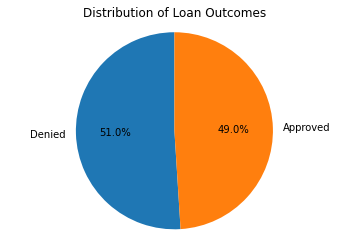

In [244]:
# Pie chart to show Loan Outcomes distribution
outcome_counts = df['LoanOutcome'].value_counts()
plt.figure()
plt.pie(outcome_counts, labels=outcome_counts.index, autopct='%1.1f%%', startangle=90) 
plt.title('Distribution of Loan Outcomes')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

From the historical data, I have found that the bank rejected more loan outcomes than it accepted. However, the difference between both is not much.

## Step 2 - Feature Engineering

There are a number of factors that banks have to consider before a loan can be given to an applicant. The two main factors are:
- Debt-to-income ratio: this ratio shows how much of the applicant's income is already committed towards paying off existing debts, which is crucial for assessing their ability to take on additional loans.
- Loan-to-income ratio: this ratio assesses how much of the applicant's income is being requested as a loan. High LTI values may indicate higher risk, as it shows the proportion of income required to service the new loan.

Calculating the debt-to-income ratio  (DTI)

In [245]:
df['DTI'] = (df['OutstandingDebt'] / (df['AnnualIncome'] / 12)) * 100 #converting to decimal
df['DTI'] = df['DTI'].round(2) #rounding to two decimal places

Calculating the loan-to-income ratio (LTI)

In [246]:
df['LTI'] = (df['LoanAmount'] / df['AnnualIncome']) * 100
df['LTI'] = df['LTI'].round(2)

In [247]:
# Previewing the dataset with the the new features
df[['LoanAmount', 'AnnualIncome', 'DTI', 'LTI']].head()

,LoanAmount,AnnualIncome,DTI,LTI
0,417034,6306291,30.40,6.61
1,5730135,7555169,53.06,75.84
2,1886511,9578220,20.04,19.70
3,9468833,7697704,0.54,123.01
4,655286,9040140,14.62,7.25


Calculating the employment length

In [248]:
# Calculate the difference in years
# Ensuring EmploymentStartDate is in datetime format 
df['EmploymentStartDate'] = pd.to_datetime(df['EmploymentStartDate'])

current_date = pd.to_datetime("today")
df['EmploymentLength'] = (current_date - df['EmploymentStartDate']).dt.days / 365

df['EmploymentLength'] = df['EmploymentLength'].round(0)  # To get whole years

# Previewing the dataset with the new Employment Length feature
df[['EmploymentStartDate', 'EmploymentLength']].head()


,EmploymentStartDate,EmploymentLength
0,2011-11-24,13.0
1,2006-12-25,18.0
2,2006-05-06,18.0
3,2009-01-22,16.0
4,2005-10-19,19.0


Two additional features were created to help group the data for visualization and potentially modelling purposes. I thought it could be beneficial to add a credit score band to turn the continuous credit scores into a categorical variable. I used the FICO/vantage score range for the credit scores grouping. I also used bins to group the incomes of the applicants into ranges. 

In [249]:
# Defining a function to categorize credit scores
def credit_score_band(score):
    if score < 580:
        return 'Poor'
    elif score < 670:
        return 'Fair'
    elif score < 740:
        return 'Good'
    elif score < 800:
        return 'Very Good'
    else:
        return 'Excellent'

df['CreditScoreBand'] = df['CreditScore'].apply(credit_score_band)

# Preview the updated dataset
df[['CreditScore', 'CreditScoreBand']].head()


,CreditScore,CreditScoreBand
0,655,Fair
1,652,Fair
2,490,Poor
3,759,Very Good
4,800,Excellent


In [250]:
bins = [0, 4000000, 8000000, 12000000, float('inf')]  
labels = ['Low Income', 'Middle Income', 'Upper Middle Income', 'High Income']

# Creating the categorical variable
df['IncomeCategory'] = pd.cut(df['AnnualIncome'], bins=bins, labels=labels)

# Preview the new categorical variable
print(df[['AnnualIncome', 'IncomeCategory']].head())

   AnnualIncome       IncomeCategory
0       6306291        Middle Income
1       7555169        Middle Income
2       9578220  Upper Middle Income
3       7697704        Middle Income
4       9040140  Upper Middle Income


In [251]:
#previewing the dataset to see new features
df.head()

,ApplicationDate,CreditScore,AnnualIncome,LoanAmount,EmploymentStatus,OutstandingDebt,EmploymentStartDate,LoanOutcome,DTI,LTI,EmploymentLength,CreditScoreBand,IncomeCategory
0,2021-01-01,655,6306291,417034,Employed,159749,2011-11-24,Denied,30.40,6.61,13.0,Fair,Middle Income
1,2021-01-02,652,7555169,5730135,Self-Employed,334035,2006-12-25,Approved,53.06,75.84,18.0,Fair,Middle Income
2,2021-01-03,490,9578220,1886511,Unemployed,159927,2006-05-06,Approved,20.04,19.70,18.0,Poor,Upper Middle Income
3,2021-01-04,759,7697704,9468833,Unemployed,3438,2009-01-22,Denied,0.54,123.01,16.0,Very Good,Middle Income
4,2021-01-05,800,9040140,655286,Self-Employed,110166,2005-10-19,Approved,14.62,7.25,19.0,Excellent,Upper Middle Income


## Visualizations

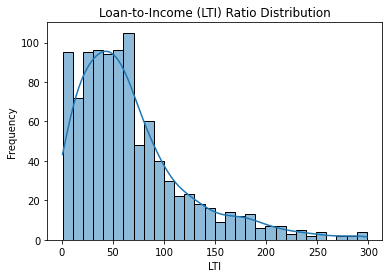

In [252]:
# Plot the distribution of the LTI ratio
sns.histplot(df['LTI'], bins=30, kde=True)
plt.title('Loan-to-Income (LTI) Ratio Distribution')
plt.xlabel('LTI')
plt.ylabel('Frequency')
plt.show()

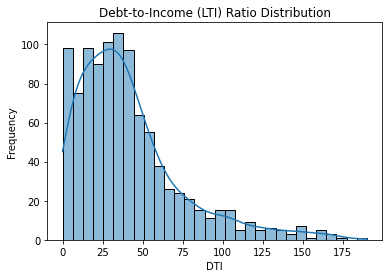

In [253]:
plt.figure()
sns.histplot(df['DTI'], bins=30, kde=True)
plt.title('Debt-to-Income (DTI) Ratio Distribution')
plt.xlabel('DTI')
plt.ylabel('Frequency')
plt.show()

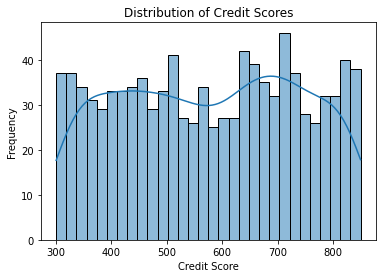

In [216]:
plt.figure()
sns.histplot(df['CreditScore'], bins=30, kde=True)
plt.title('Distribution of Credit Scores')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.show()


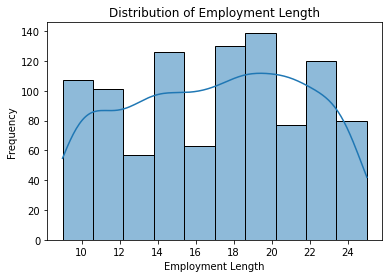

In [266]:
plt.figure()
sns.histplot(df['EmploymentLength'], bins=10, kde=True)
plt.title('Distribution of Employment Length')
plt.xlabel('Employment Length')
plt.ylabel('Frequency')
plt.show()

### Visualizing the relationships between features and loan outcomes

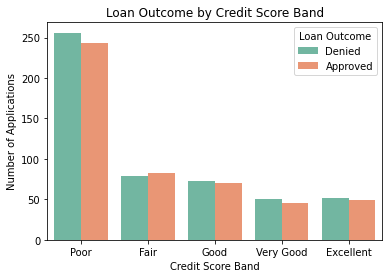

In [254]:
# Defining the order of Credit Score Bands
credit_score_order = ['Poor', 'Fair', 'Good', 'Very Good', 'Excellent']

plt.figure() #figsize=(10, 6)
sns.countplot(data=df, x='CreditScoreBand', hue='LoanOutcome', palette='Set2', order=credit_score_order)
plt.title('Applications by Credit Score Band')
plt.xlabel('Credit Score Band')
plt.ylabel('Number of Applications')
plt.legend(title='Loan Outcome', loc='upper right')
plt.show()


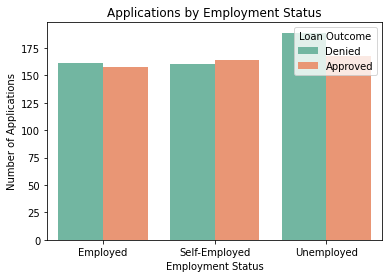

In [260]:
plt.figure()
sns.countplot(data=df, x='EmploymentStatus', hue='LoanOutcome', palette='Set2')
plt.title('Applications by Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Number of Applications')
plt.legend(title='Loan Outcome', loc='upper right')
plt.show()


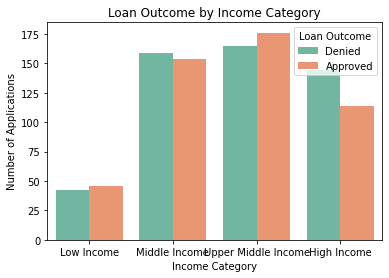

In [258]:
plt.figure()
sns.countplot(data=df, x='IncomeCategory', hue='LoanOutcome', palette='Set2')
plt.title('Loan Outcome by Income Category')
plt.xlabel('Income Category')
plt.ylabel('Number of Applications')
plt.legend(title='Loan Outcome', loc='upper right')
plt.show()

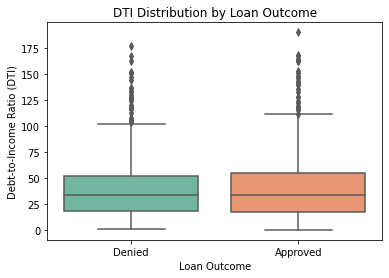

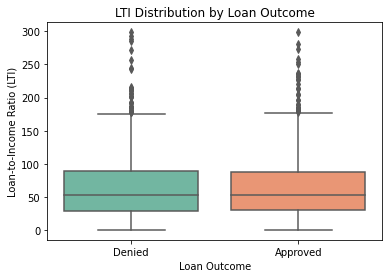

In [262]:
# Box plot for DTI vs LoanOutcome
plt.figure()
sns.boxplot(data=df, x='LoanOutcome', y='DTI', palette='Set2')
plt.title('DTI Distribution by Loan Outcome')
plt.xlabel('Loan Outcome')
plt.ylabel('Debt-to-Income Ratio (DTI)')
plt.show()

# Box plot for LTI vs LoanOutcome
plt.figure()
sns.boxplot(data=df, x='LoanOutcome', y='LTI', palette='Set2')
plt.title('LTI Distribution by Loan Outcome')
plt.xlabel('Loan Outcome')
plt.ylabel('Loan-to-Income Ratio (LTI)')
plt.show()


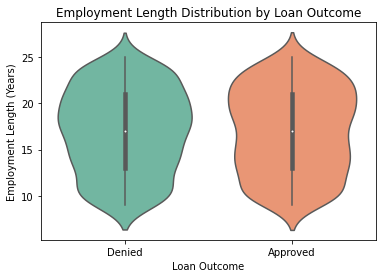

In [263]:
# Violin plot for Employment Length vs LoanOutcome
plt.figure()
sns.violinplot(data=df, x='LoanOutcome', y='EmploymentLength', palette='Set2')
plt.title('Employment Length Distribution by Loan Outcome')
plt.xlabel('Loan Outcome')
plt.ylabel('Employment Length (Years)')
plt.show()


A pair plot can be used to show the relationships between all of the continuous features at once. These information gleaned from these visualizations will hopefully be supported by the ML algorithm later on. 

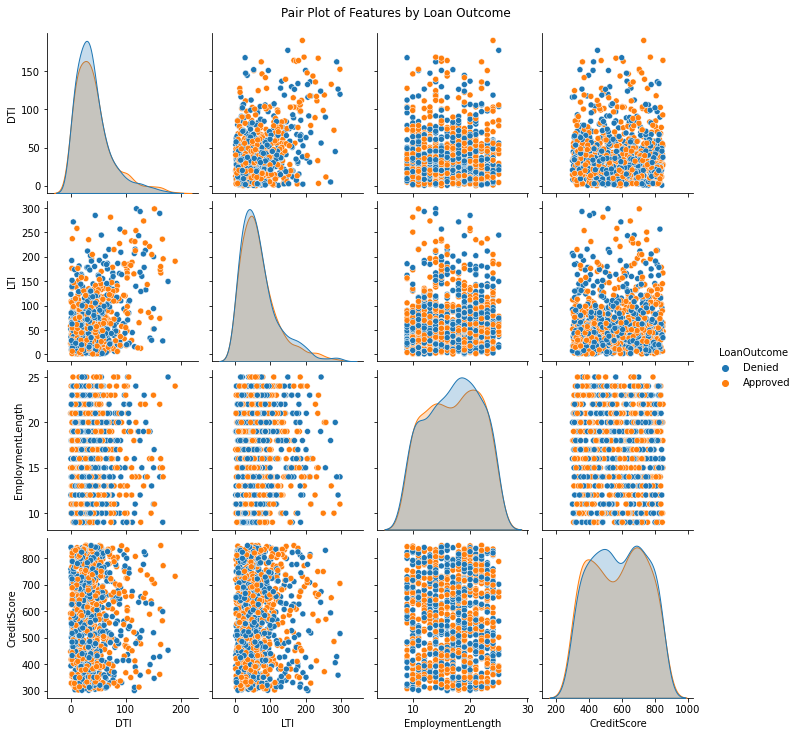

In [264]:
sns.pairplot(df, hue='LoanOutcome', vars=['DTI', 'LTI', 'EmploymentLength', 'CreditScore'])
plt.suptitle('Pair Plot of Features by Loan Outcome', y=1.02)
plt.show()


## Step 3 - Model Building 

For the model, I chose the Random Forest Machine Learning Algorithm. The algorithm combines multiple decision trees to improve accuracy and handle overfitting. I chose this model primarily because it handles both categorical and continuous variables well without a need for feature scaling and is also capable of capturing non-linear relationships. It also has a feature importance function, which could be useful later. 

## Random Forest

In [267]:
# Defining features (X) and target variable (y)
X = df.drop(columns=['LoanOutcome', 'ApplicationDate', 'EmploymentStartDate', 'CreditScoreBand', 'IncomeCategory'])  # Dropping unnecessary columns.
#creditscoreband and incomecategory were both dropped because theres no need to include them with credit score and annual income. 
y = df['LoanOutcome'].map({'Approved': 1, 'Denied': 0})  # Encoding LoanOutcome as binary

# One-hot encoding for categorical variables like EmploymentStatus
X = pd.get_dummies(X, drop_first=True)

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=54)
#It is typical to train the model on between 70-80% of the data

# Checking the shape of the train and test sets
print(f'Training set shape: {X_train.shape}, Testing set shape: {X_test.shape}')

Training set shape: (800, 9), Testing set shape: (200, 9)


In [268]:
# Creating a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=54)

# Fitting the model to the training data
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=54)

In [269]:
# Making predictions on the test set
y_pred = rf_model.predict(X_test)

The final step of the model building is testing the strength of the model with accuracy score, precision score, recall score and f1 score.
Metric Justification: 
- Accuracy Score: This metric measures how often the model predicts the correct class (approved or denied). While it gives a general idea of the model's performance, it might not be the most reliable metric if the classes are imbalanced (the target variable distribution done earlier proves that there is a healthy balance).  
- Precision Score: This metric measures how many of the predicted positive cases (i.e approved loans) are actually positive. It is critical in this scenario because predicting loans as approved when they should be denied is a costly error for a bank. 
- Recall:This metric measures how many actual positive cases the model correctly identified. Denying loans that should have been approved can also be problematic for a bank. However, not as much as approving loans that should have been rejected. 
- F1 score: This also gives an overall idea of model performance by combining precision and recall, which is useful if the two metrics are different.

In [270]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [271]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.2f}")

# Recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.2f}")

# F1 Score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.2f}")


Accuracy: 0.55
Precision: 0.55
Recall: 0.41
F1 Score: 0.47


Metric Results; 
- Accuracy Score: An accuracy score of 0.55 means that the model correctly predicted the loan outcome for 55% of the cases. 
- Precision: A precision score of 0.55 basically means that out of all the loans the model predicted as approved, 55% were actually approved. This indicates that the model is fairly good at identifying true approvals.
- Recall: The recall score of 0.41 basically means that out of all the loans that were actually approved, the model identified only 41%. The low recall value suggests the model is missing a number of true approved loans.
- F1 score: The 0.47 F1 score suggests that there’s an imbalance between precision and recall.

Truthfully, the accuracy, recall and F1 scores should be much better. However, I tried a number of other algorithms such as logistic regression, random forest, SVM and K Nearest Neighbour. I also attempted the model with different feature combinations based on feature importance. Hyper parameter was also performed on the random forest algorithm. However, this specific version of the algorithm consistently provided the highest Accuracy score. Leading me to believe that there could be an issue with the data. However, I was not able to discover the specific flaw in the data due to time constraints. The visualizations of the relationships between the features and the dependent variable were also consistent with the model results.

## Step 4 - Model Interpretation

The final step of the project is interpreting the model coefficients or feature importances to identify which features have the most significant impact on loan approval decisions.


Getting the feature importances (an influential factor in the decision to use the random forest algorithm)

In [272]:
# Get feature importances
importances = rf_model.feature_importances_

feature_names = X_train.columns  

# Creating a DataFrame to hold feature names and their importances
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sorting the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Displaying the feature importances
print(importance_df)


                          Feature  Importance
0                     CreditScore    0.153135
3                 OutstandingDebt    0.150005
2                      LoanAmount    0.144916
1                    AnnualIncome    0.141823
5                             LTI    0.134748
4                             DTI    0.134630
6                EmploymentLength    0.103665
8     EmploymentStatus_Unemployed    0.020767
7  EmploymentStatus_Self-Employed    0.016310


Based on the feature importance, Credit Score and Outstanding Debt have the most statistically significant relationship with the loan outcome: 
- CreditScore (0.153135): This feature has the highest importance, indicating that a borrower's credit score significantly influences the decision to approve or deny a loan. Higher credit scores typically correlate with lower risk for the bank.
- OutstandingDebt (0.150005): This feature is the second most important. It suggests that the amount of outstanding debt a borrower has plays a critical role in loan approval decisions. Higher outstanding debts may indicate a higher risk of default.
- LoanAmount (0.144916): The loan amount requested by the borrower is also a crucial factor. Lenders may be more cautious with larger loan amounts, as they carry a higher risk.

The risk factors affecting model outcomes are; 
- Financial Metrics Matter: The model shows that financial metrics (CreditScore, OutstandingDebt, LoanAmount, AnnualIncome, DTI, and LTI) are paramount in evaluating loan applications. This highlights the importance of thorough financial assessments by the bank.
- Employment Stability: While employment length does play a role, its influence is less than that of financial indicators. This may suggest that the bank prioritizes immediate financial health over job stability when making lending decisions.

While visualizations had been created in an earlier phase to show the relationship between the features and the loan outcome. One visualization that could not be created at the time is the ROC curve. An ROC curve is a graphical representation that shows how well a binary classification model (like a random forest or logistic regression) can distinguish between two classes; in this case approved vs. denied loans.

It plots the True Positive Rate (Recall) against the False Positive Rate at different threshold settings. The area under the curve (AUC) is a measure of the model's performance—the closer the curve is to the top-left corner, the better the model is at predicting outcomes. 

### Developing an ROC curve with model results

In [273]:
from sklearn.metrics import roc_curve, auc


In [274]:
# Initializing Random Forest Classifier
rf_model = RandomForestClassifier(random_state=54)

# Fitting the model
rf_model.fit(X_train, y_train)

# Getting probabilities for the positive class
y_scores = rf_model.predict_proba(X_test)[:, 1]


In [275]:
# Calculating the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calculating the AUC
roc_auc = auc(fpr, tpr)


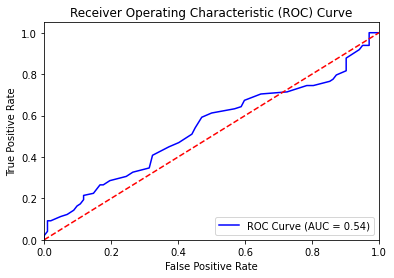

In [276]:
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


Unfortunately, the ROC curve simply confirms the issues with the model that were observed with the accuracy and F1 score metrics.